# Evaluacion de Random Forest

.- Tiempo <br>
.- Score <br>
.- Matrices de confusión <br>
.- Classification report ( Precision, Recall, f1-score, support)<br>

In [67]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [68]:
clases_binarias=['Normal','Ataque']
#corresponde a 'Normal=0, Ataque=1
clases_5=['dos','normal','probe','r2l','u2r']
#corresponde a dos=0; normal=1, probe=2
#aunque posiblemente de error poque están definidos desde 1 en vez de 0, porque azeem

## Reading the libraries

In [69]:
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)#Prueba evaluación y entrenamiento un solo individuo. 
#Vectores completos

# Definicion de la matriz de confusion

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm= confussion matriz
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm*100
        print("Matriz de Confusión Porcentaje \n")
    else:
        print('Matriz de Confusión \n')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=23)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    sns.set_style('dark')
    plt.tight_layout()
    plt.ylabel('Clases Originales',fontsize=18)
    plt.xlabel('Clases Predecidas',fontsize=18)



In [71]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Reading the Datasets with the labels

In [72]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Test.csv')


In [73]:
#NSL TESTING LABELS

#Index binary (2 clases)
L_nsl_testing_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_testing_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_testing_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_testing_indextipeofattack.csv")


#nsl TRAINING LABELS
# 2 clases
L_nsl_training_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_training_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_training_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_training_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_training_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_training_indextipeofattack.csv")

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)




In [75]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.6789991855621338 seconds ---


In [76]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11250495910644531 seconds ---


In [77]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.68      0.97      0.80      9710
          1       0.97      0.65      0.78     12833

avg / total       0.84      0.79      0.79     22543



In [78]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17811
Porcentaje de exactitud: 0.790090050126 (accuracy score)


In [79]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9438,  272],
       [4460, 8373]])

Matriz de Confusión 

[[9438  272]
 [4460 8373]]


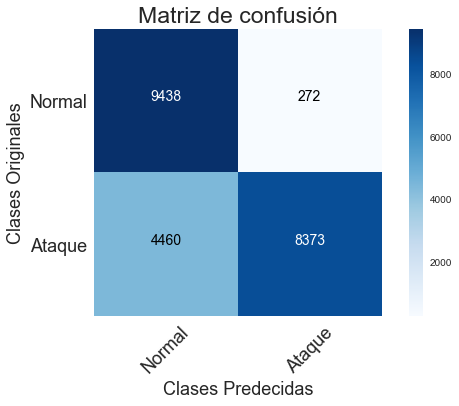

In [80]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
sns.set_style('dark')
plt.show()
plt.savefig("RF_2_Clases_no_normalizada.png", dpi=300)

Matriz de Confusión Porcentaje 

[[ 97.2    2.8 ]
 [ 34.75  65.25]]


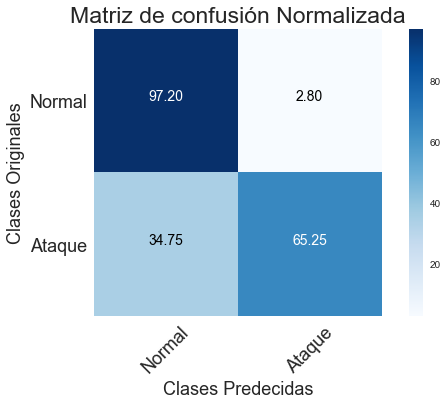

In [81]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
sns.set_style('dark')
plt.show()
plt.savefig("RF_2_Clases_normalizada.png", dpi=300)

# 5 clases

In [82]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=50, n_estimators=5)


In [83]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.46314191818237305 seconds ---


In [84]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11295604705810547 seconds ---


In [85]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.73      0.83      7458
          2       0.65      0.97      0.78      9710
          3       0.79      0.67      0.72      2421
          4       1.00      0.05      0.09      2754
          5       0.00      0.00      0.00       200

avg / total       0.80      0.74      0.70     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 16655
Porcentaje de exactitud: 0.738810273699 (accuracy score)


In [87]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[5458, 1817,  183,    0,    0],
       [  67, 9458,  185,    0,    0],
       [ 176,  633, 1612,    0,    0],
       [   1, 2562,   64,  127,    0],
       [   0,  193,    7,    0,    0]])

Matriz de Confusión 

[[5458 1817  183    0    0]
 [  67 9458  185    0    0]
 [ 176  633 1612    0    0]
 [   1 2562   64  127    0]
 [   0  193    7    0    0]]


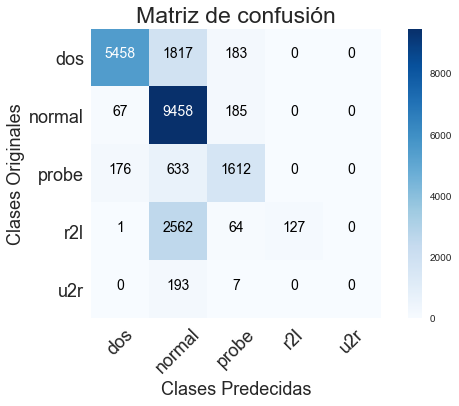

In [88]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
sns.set_style('dark')
plt.show()
plt.savefig("RF_5_Clases_no_normalizada.png", dpi=300)

Matriz de Confusión Porcentaje 

[[  7.32e+01   2.44e+01   2.45e+00   0.00e+00   0.00e+00]
 [  6.90e-01   9.74e+01   1.91e+00   0.00e+00   0.00e+00]
 [  7.27e+00   2.61e+01   6.66e+01   0.00e+00   0.00e+00]
 [  3.63e-02   9.30e+01   2.32e+00   4.61e+00   0.00e+00]
 [  0.00e+00   9.65e+01   3.50e+00   0.00e+00   0.00e+00]]


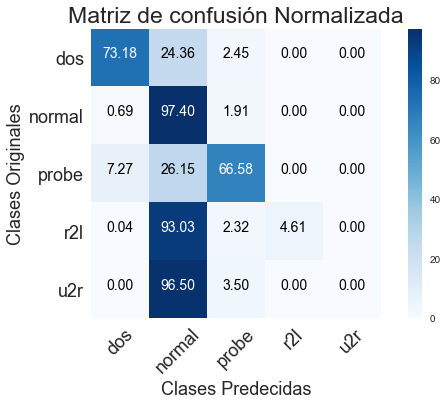

In [89]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
sns.set_style('dark')
plt.show()
plt.savefig("RF_5_Clases_normalizada.png", dpi=300)

In [25]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.94      0.80      0.86      7458
          2       0.66      0.97      0.79      9710
          3       0.80      0.61      0.70      2421
          4       0.96      0.03      0.06      2754
          5       1.00      0.01      0.01       200

avg / total       0.81      0.75      0.71     22543



In [26]:
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.753803841547 (accuracy score)


In [27]:
modelo.score(nsl_testing,L_nsl_testing_indexbygroup)

0.75380384154726521